# Correlation between metrics

In [78]:
pred_metrics_list = {'acc' : accuracy_score, 
                'mcc' : matthews_corrcoef,
                'f1_score': f1_score,
                'KPA' : cohen_kappa_score,
                'ARI': adjusted_rand_score,
                'NMI': normalized_mutual_info_score,
                'AMI':adjusted_mutual_info_score}

pred_metrics_list_balanced = {'balanced_acc' : balanced_accuracy_score, 
                'balanced_mcc' : balanced_matthews_corrcoef,
                'balanced_f1_score': balanced_f1_score,
                'balanced_KPA' : balanced_cohen_kappa_score,
                }

In [79]:
t1 = runs_table_df.query("task == 'task_1'")

### Correlation between balanced and unbalanced

In [ ]:
for split in ['train', 'val', 'test']:
    sub = t1.loc[:, [split + '_' + met for met in  pred_metrics_list.keys()] + [split + '_' + met for met in  pred_metrics_list_balanced.keys()] ].dropna()
    sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
    plt.title(split)
    plt.savefig(f'{fig_dir}task_1/correlation_bal_unbal_{split}.png')

### Correlation between batch entropy and prediction metrics

Text(0.5, 1.0, 'full')

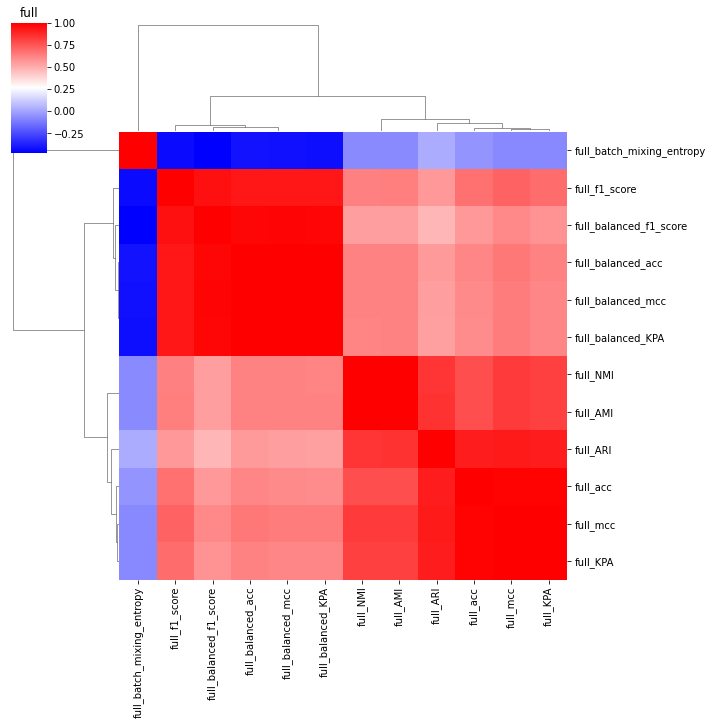

In [309]:
split = 'full'
sub = t1.loc[:, [split + '_' + met for met in  pred_metrics_list.keys()] + [split + '_' + met for met in  pred_metrics_list_balanced.keys()] + [f'{split}_batch_mixing_entropy'] ].dropna()
sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
plt.title(split)

In [ ]:
for model in models:
    sub = t1.query(f'model == "{model}"')
    sub = sub.loc[:, [split + '_' + met for met in  pred_metrics_list.keys()] + [split + '_' + met for met in  pred_metrics_list_balanced.keys()] + [f'{split}_batch_mixing_entropy'] ].dropna()
    sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
    plt.title(model)
    plt.savefig(f'{fig_dir}task_1/correlation_batch_entropy_prediction_{model}.png')

### Correlation between small, large and overall prediction

In [88]:
split = 'val'
size_metrics_balanced = [i for i in runs_table_df.columns if split in i and 'balanced_acc' in i and 'training' not in i]
size_metrics_unbalanced = [i for i in runs_table_df.columns if split in i and 'mcc' in i and not 'balanced' in i and 'training' not in i]


In [89]:
sub = t1.query(f'model == "{model}"')

In [90]:
# sub.loc[:,size_metrics_balanced + size_metrics_unbalanced].dropna(axis = 1)
sub.loc[:,size_metrics_balanced]

,val_balanced_acc,val_large_balanced_acc,val_medium_balanced_acc,val_small_balanced_acc,val_xxsmall_balanced_acc
0,NaN,NaN,NaN,NaN,NaN
19,0.637091,0.364093,0.727175,0.705071,0.444444
42,0.699732,0.548194,0.772970,0.693238,0.655000
52,0.655304,0.875502,0.703670,0.676266,0.518519
59,0.675938,0.585338,0.737986,0.602616,0.875000
...,...,...,...,...,...
5986,0.000000,0.000000,0.000000,0.000000,0.000000
5992,0.756368,0.664940,0.750926,0.816667,NaN
5999,0.756368,0.664940,0.750926,0.816667,NaN
6030,0.680525,0.515038,0.733658,0.705711,0.553571


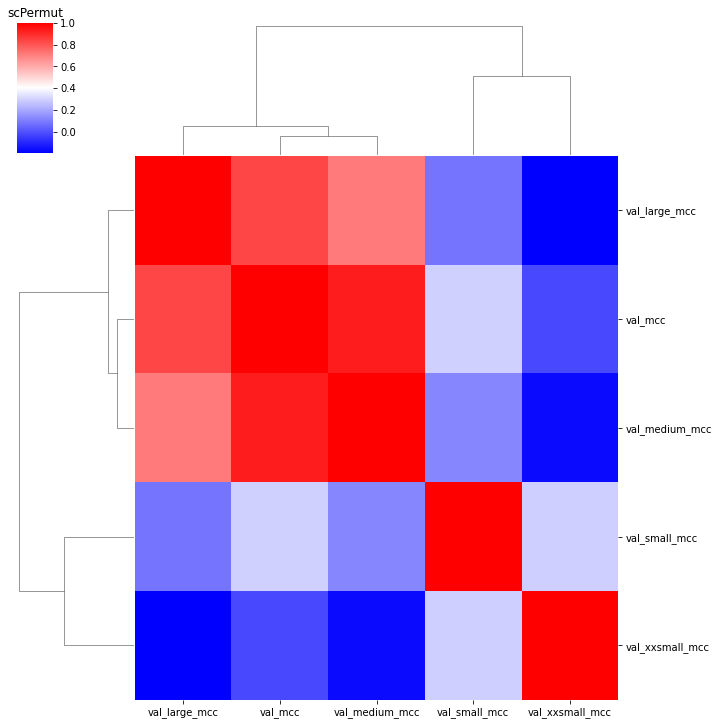

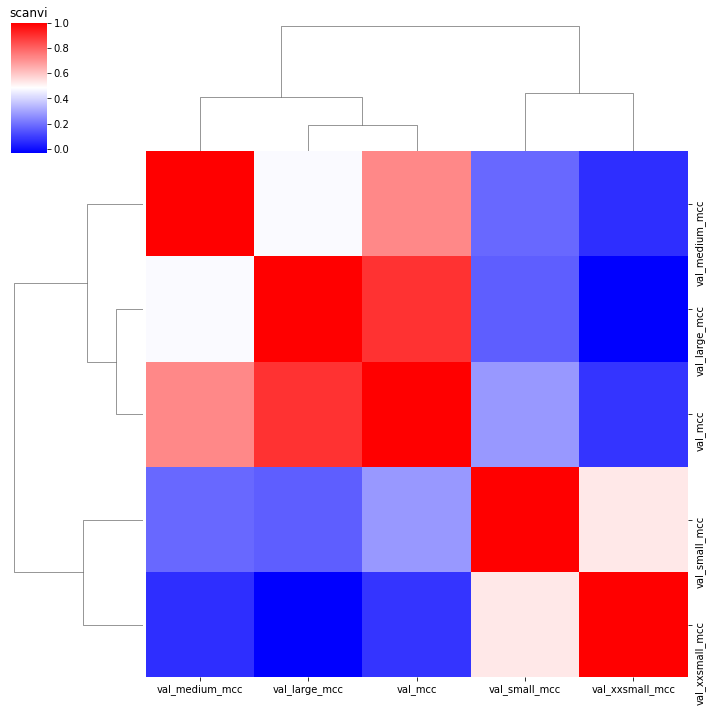

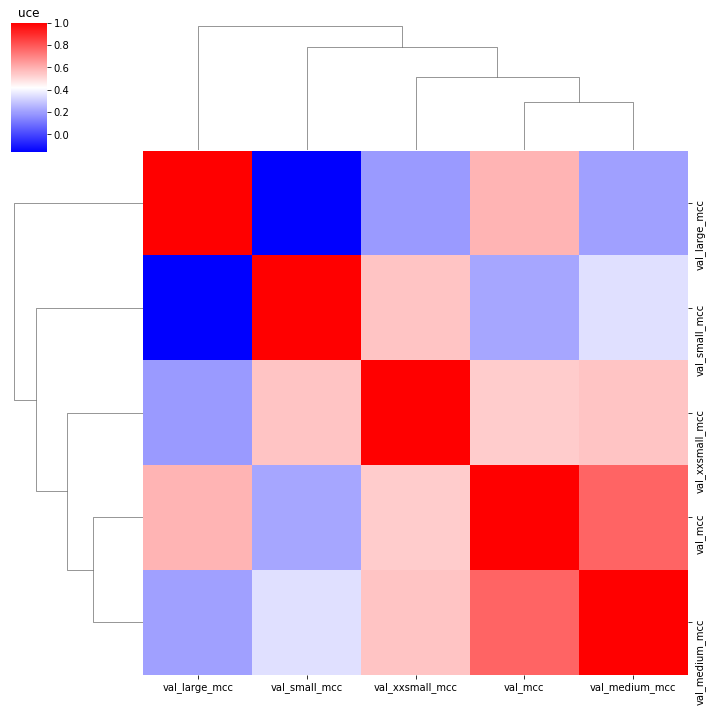

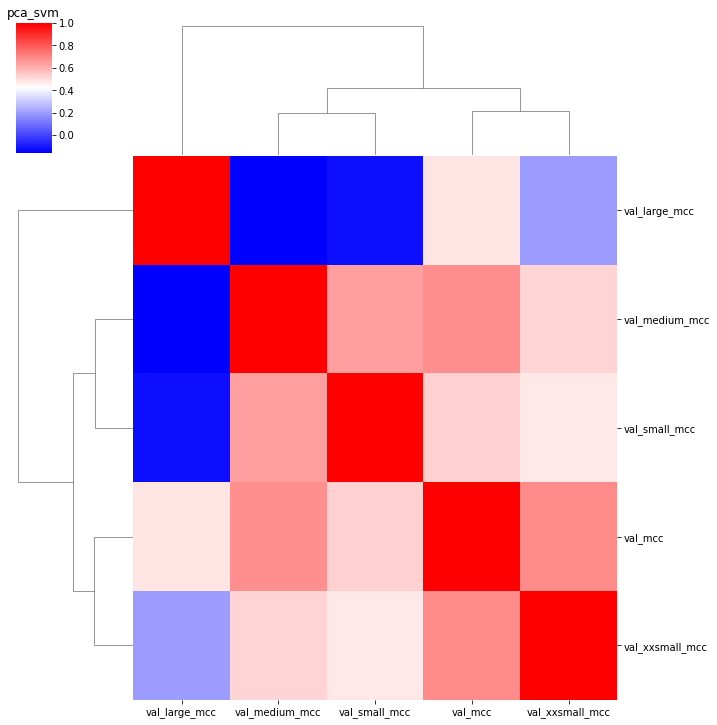

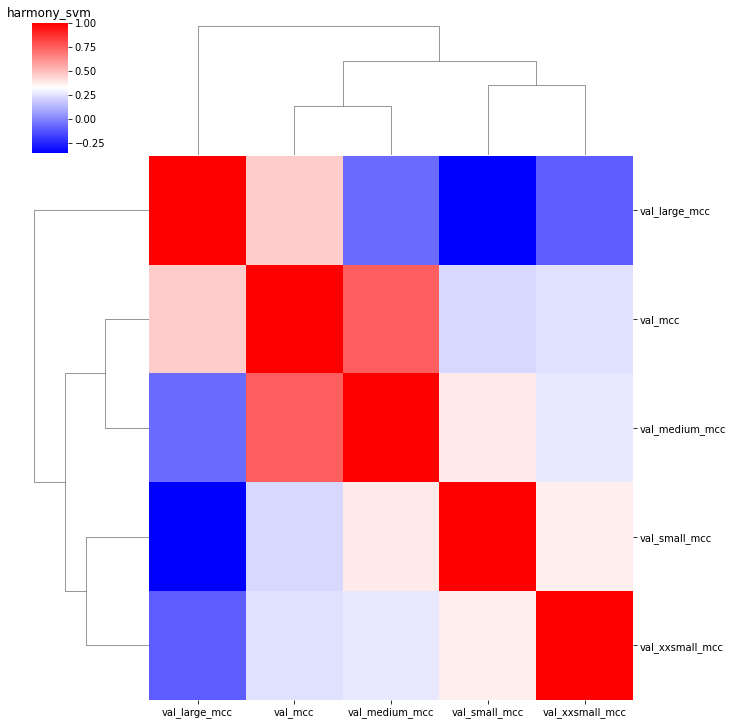

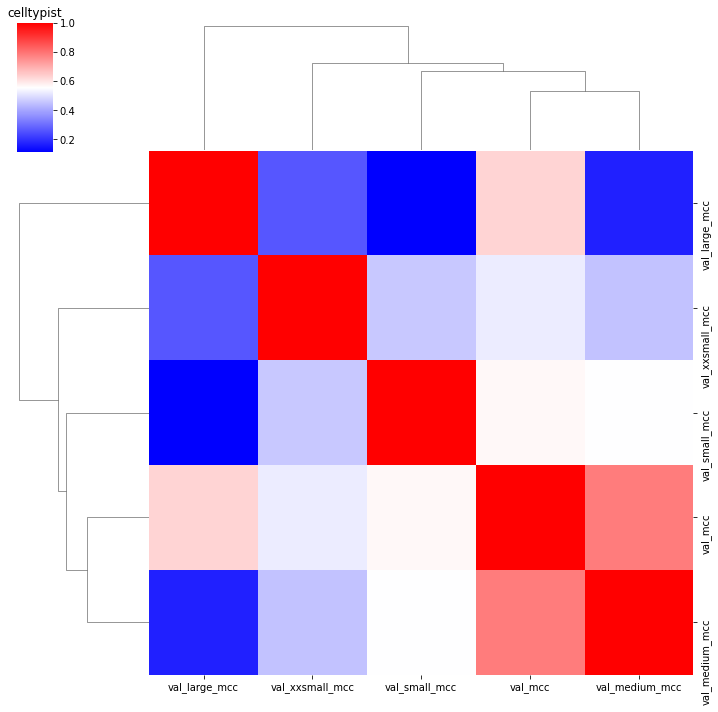

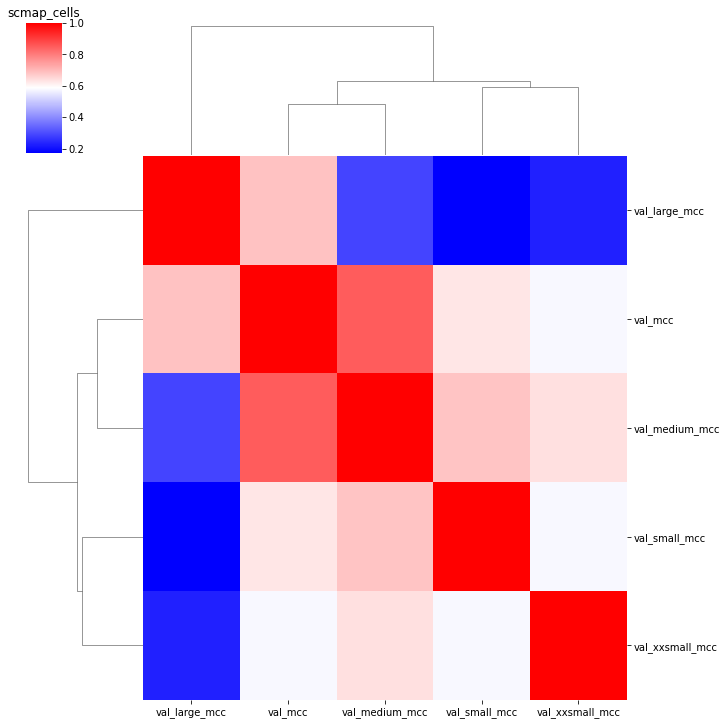

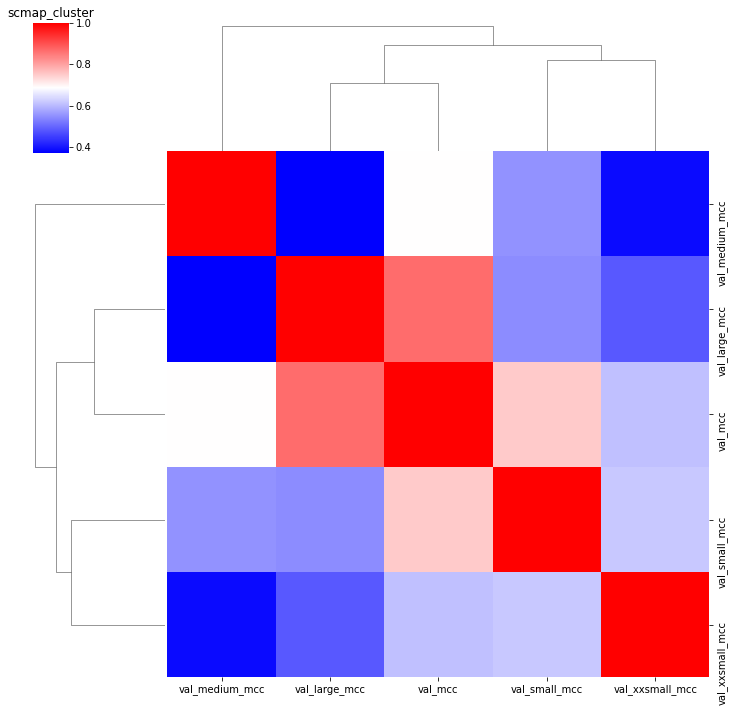

In [95]:
for model in models:
    sub = t1.query(f'model == "{model}"')
    # sub = sub.loc[:,size_metrics_balanced + size_metrics_unbalanced]
    sub = sub.loc[:,size_metrics_unbalanced].dropna(axis = 0)
    sub = sub.loc[(sub!=0).all(axis = 1)]
    sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
    plt.title(model)
    plt.savefig(f'{fig_dir}task_1/correlation_size_unbalanced/correlation_size_{model}.png')

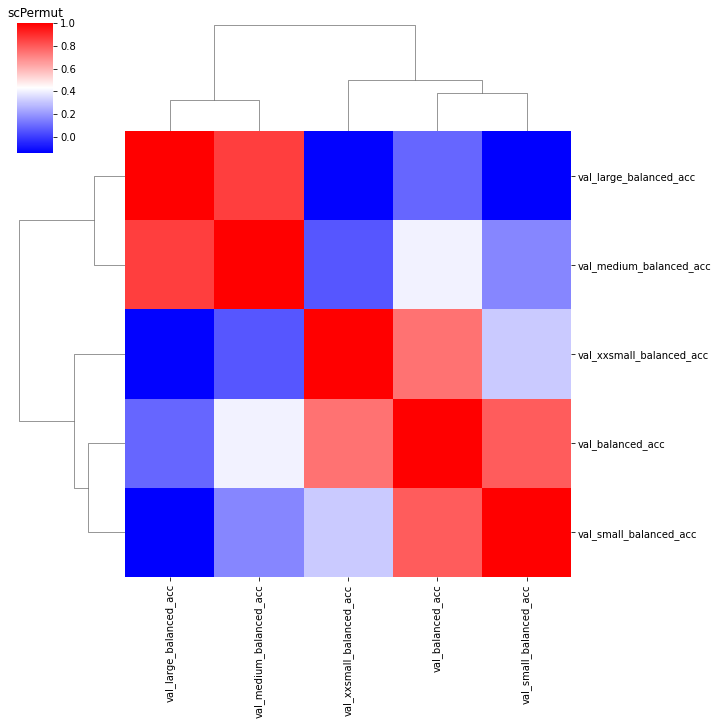

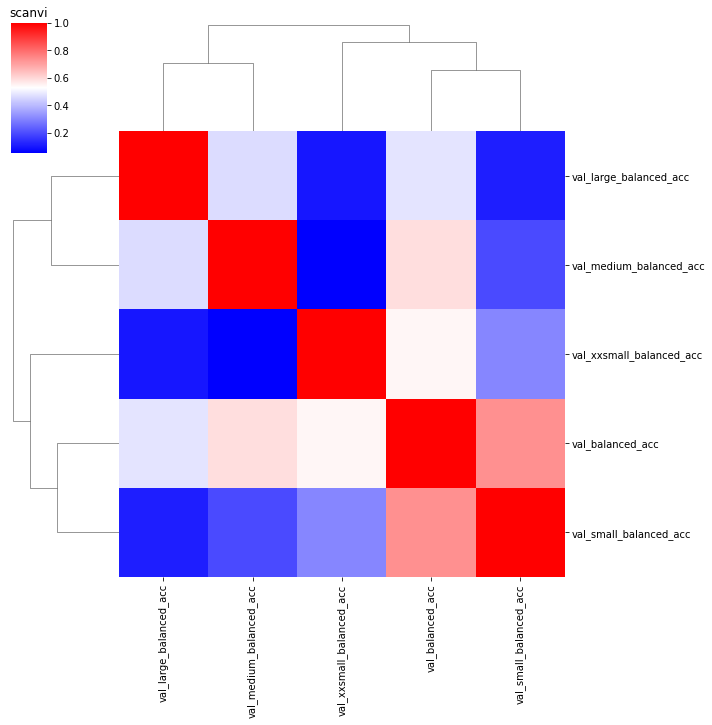

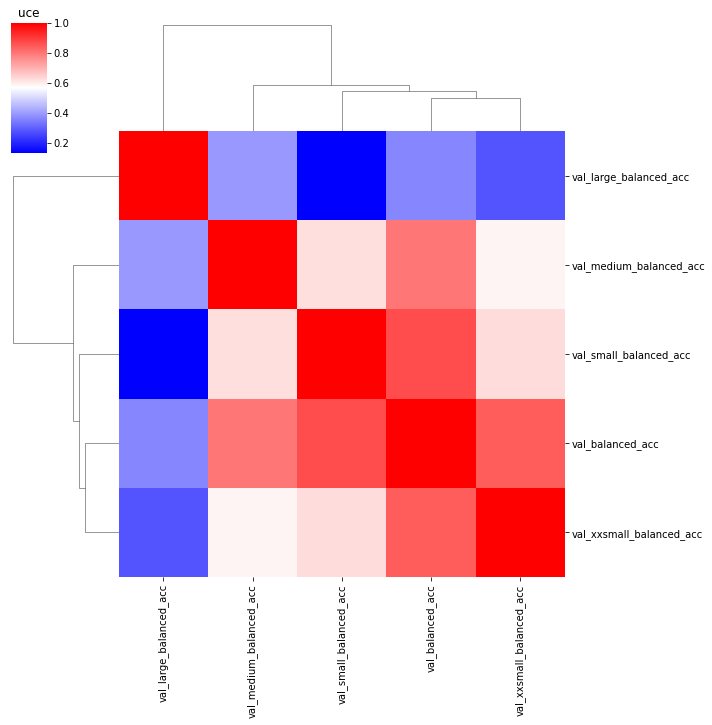

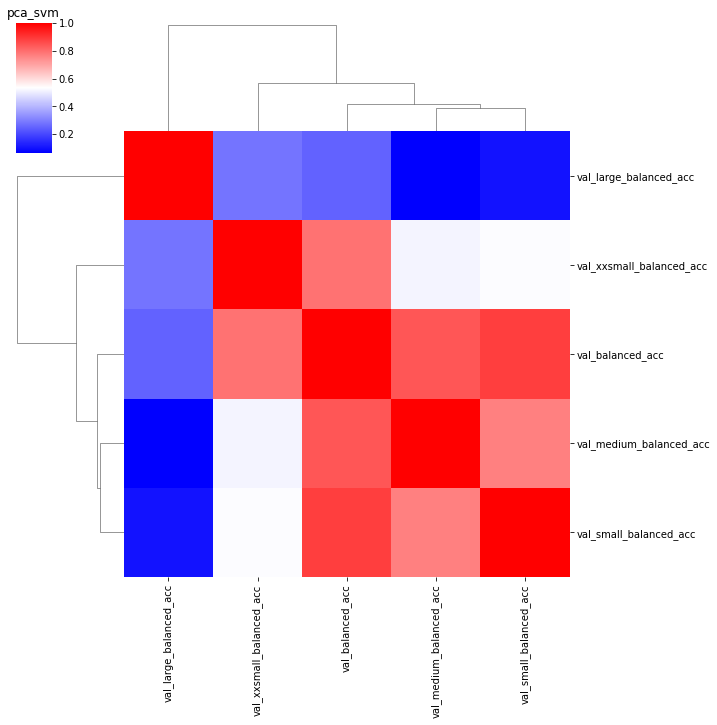

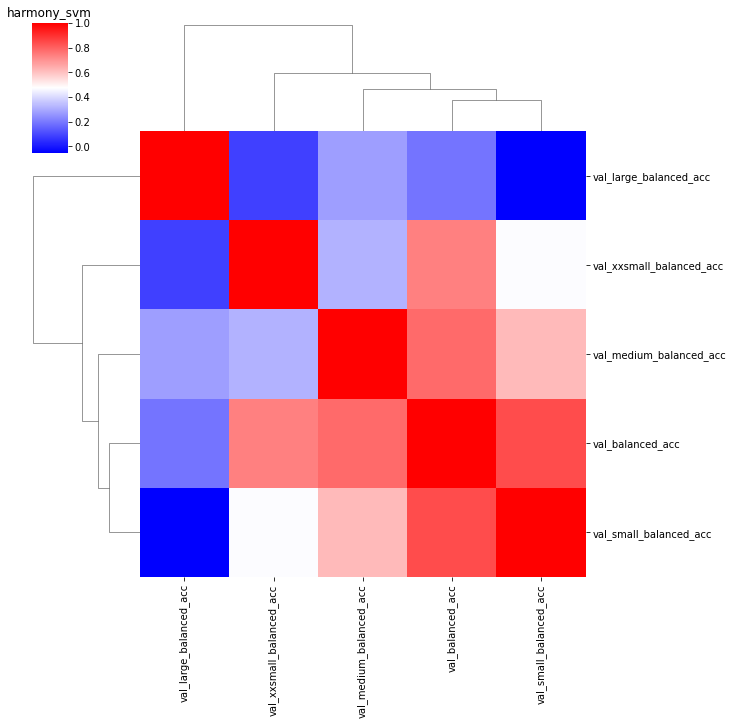

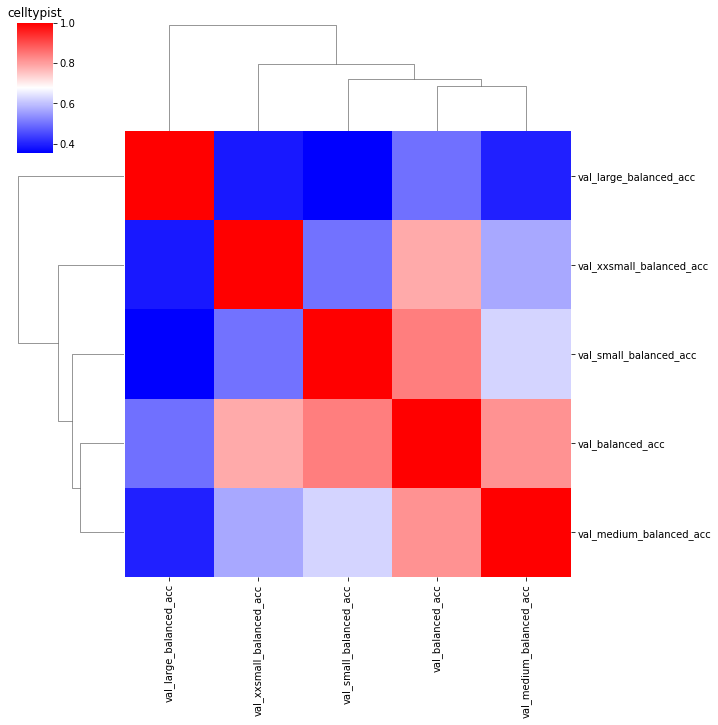

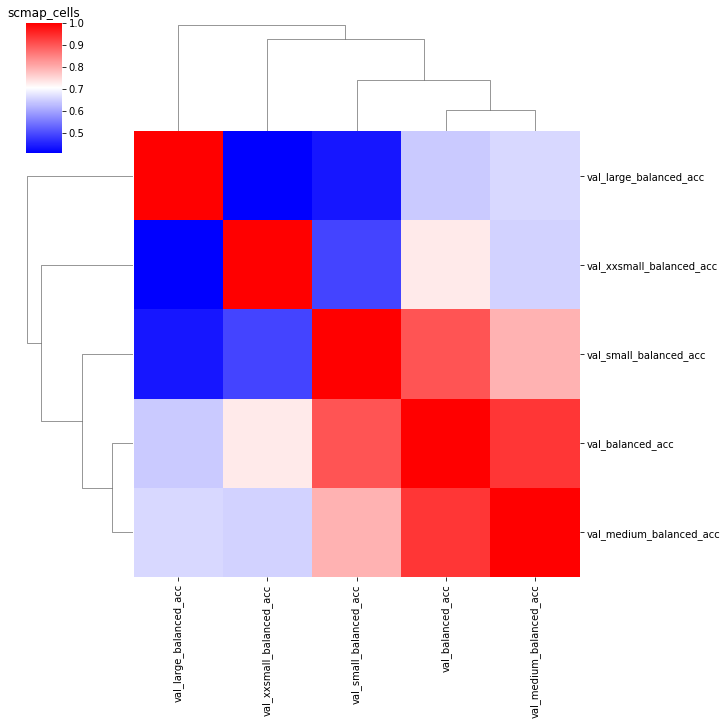

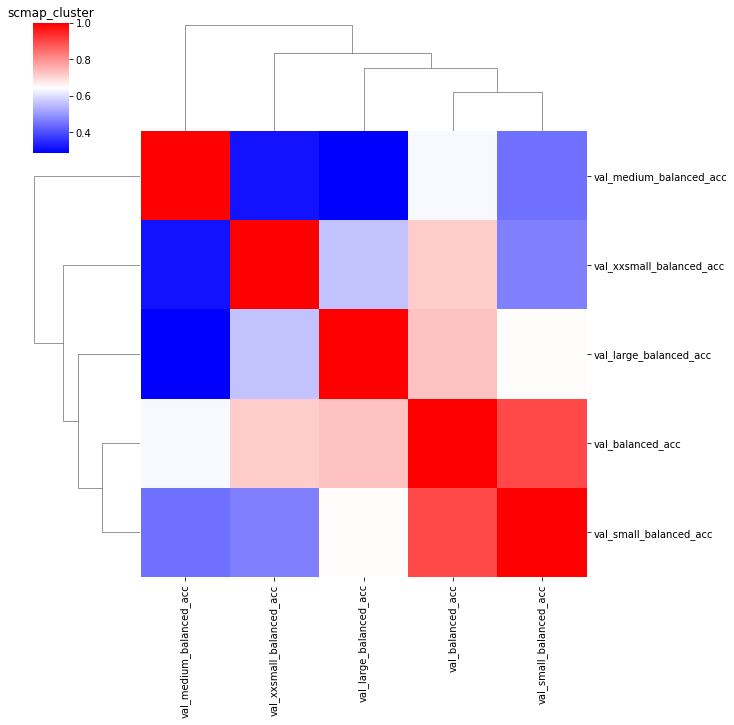

In [98]:
for model in models:
    sub = t1.query(f'model == "{model}"')
    # sub = sub.loc[:,size_metrics_balanced + size_metrics_unbalanced]
    sub = sub.loc[:,size_metrics_balanced].dropna(axis = 0)
    sub = sub.loc[(sub!=0).all(axis = 1)]
    sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
    plt.title(model)
    plt.savefig(f'{fig_dir}task_1/correlation_size_balanced/correlation_size_{model}.png')

### Correlation between train test and val -- overfitting

In [1]:
t1.query(f'model == "{model}"')

NameError: name 't1' is not defined

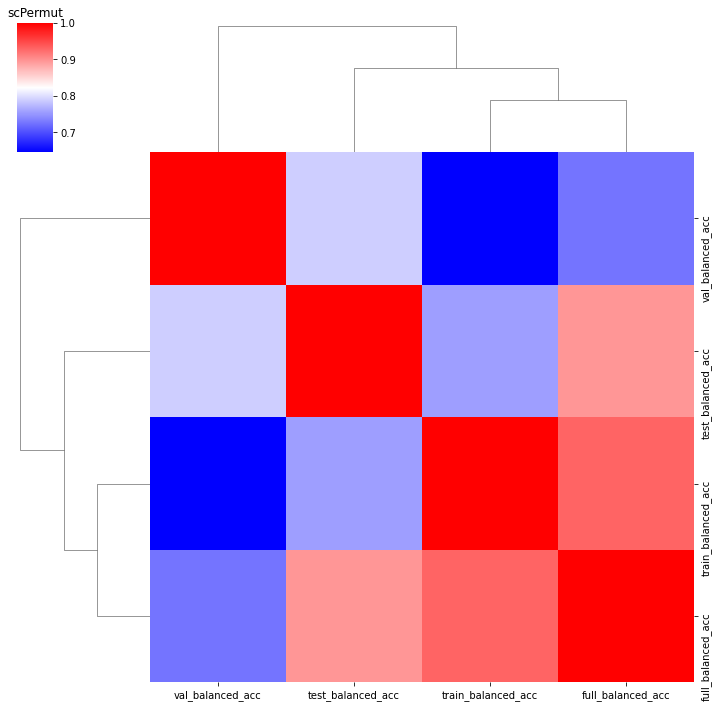

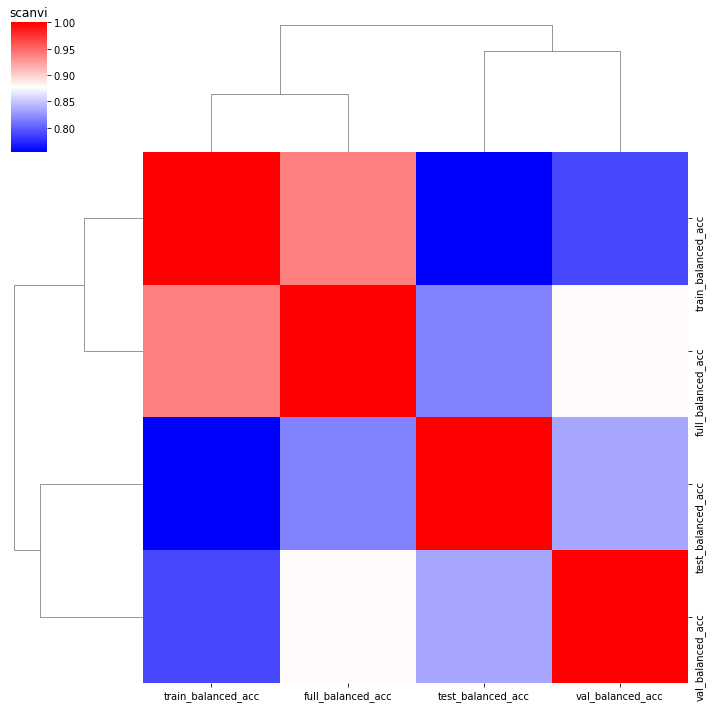

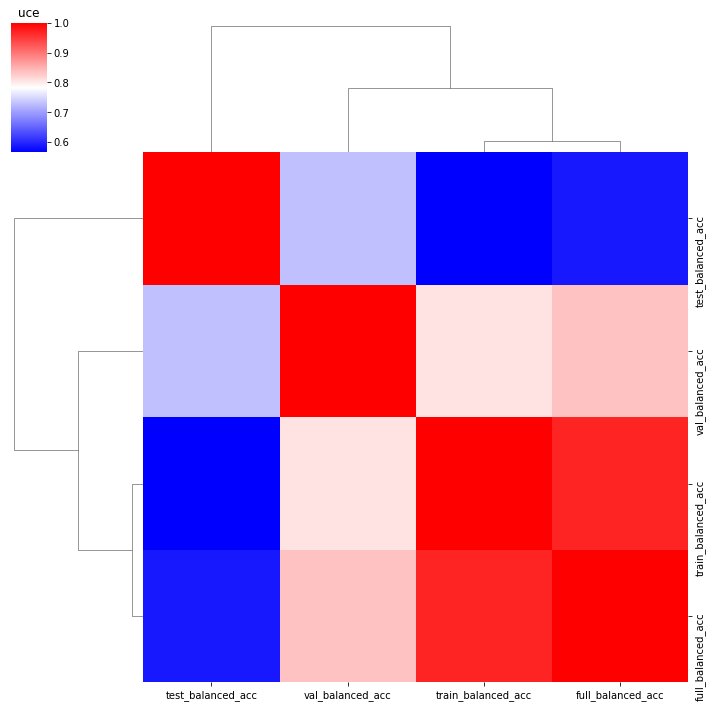

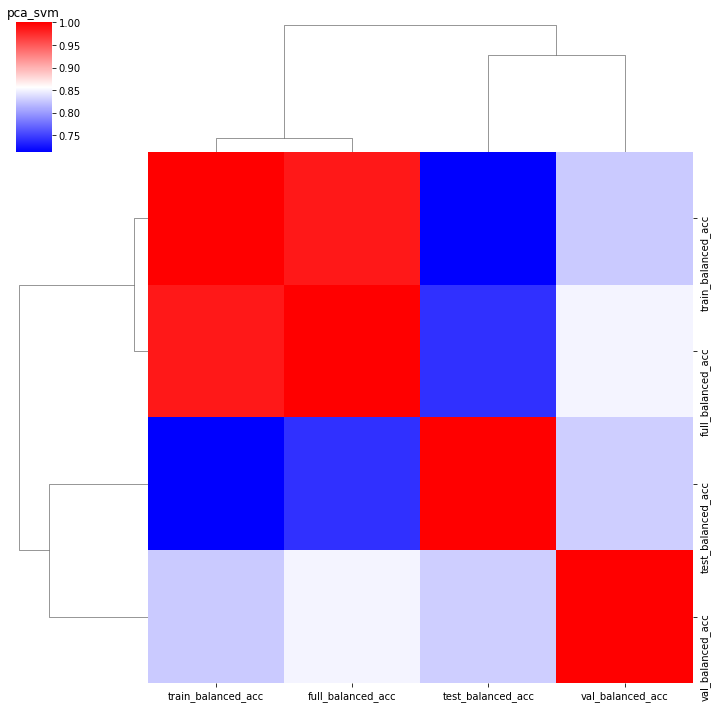

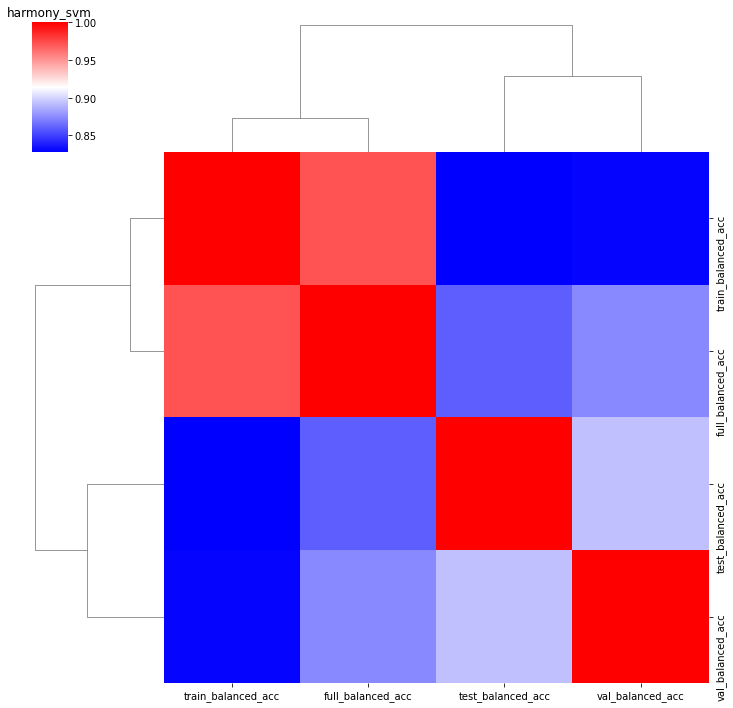

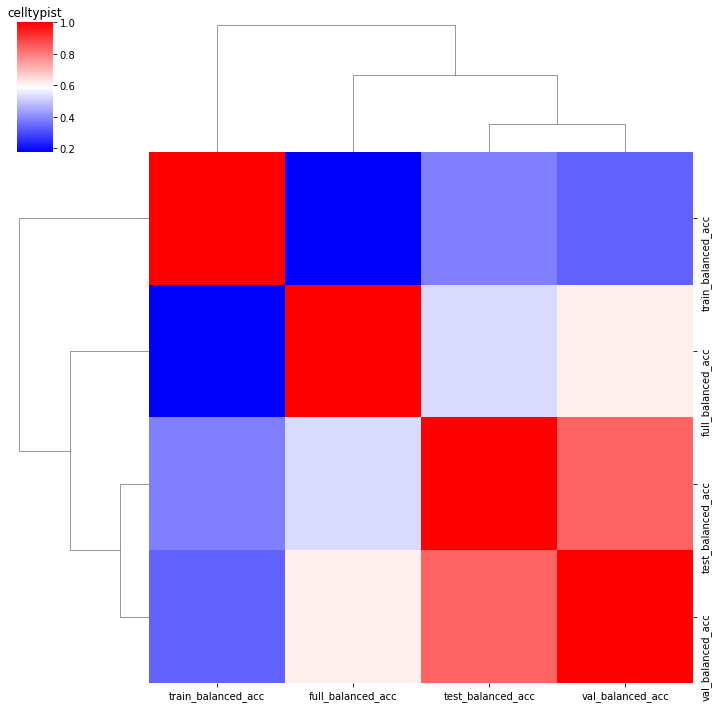

In [99]:
for model in models:
    if 'scmap' not in model :
        sub = t1.query(f'model == "{model}"')
        # sub = sub.loc[:,size_metrics_balanced + size_metrics_unbalanced]
        sub = sub.loc[:, [spl + '_balanced_acc' for spl in ['train', 'test', 'val', 'full']]].dropna(axis = 0)
        sns.clustermap(sub.corr(method='pearson'), cmap = 'bwr', vmax = 1)
        plt.title(model)
        plt.savefig(f'{fig_dir}task_1/correlation_overfitting/correlation_overfitting_{model}.png')

# yoshida test

In [ ]:
test = pd.read_csv(working_dir + 'analysis_notebooks/benchmark_metrics/yoshida_2021/task_1_test.csv', index_col ='Id')
f =  lambda x : x.replace('evaluation/', '').replace('parameters/', '').replace('/', '_')

test.columns = np.array(list(map(f, test.columns)))


In [ ]:
test

### Simple but efficient dotplots

In [ ]:
sns.boxplot(x='model',y ='val_mcc',hue = 'test_fold_nb', data = test)

In [ ]:
sns.boxplot(x='model',y ='test_mcc',hue = 'test_fold_nb', data = test)

In [ ]:
sns.boxplot(x='model',y ='val_balanced_acc',hue = 'val_fold_nb', data = test)

In [ ]:
sns.boxplot(x='model',y ='test_balanced_acc',hue = 'test_fold_nb', data = test)

In [ ]:
yosh = load_dataset('yoshida_2021', dataset_dir = working_dir + 'data')

In [ ]:
def load_confusion_matrix(neptune_id,train_split= 'val', working_dir = None):
    if working_dir :
        save_dir = working_dir + 'experiment_script/results/' + str(neptune_run_id) + '/'
    else :
        save_dir = './experiment_script/results/' + str(neptune_id) + '/'
    return pd.read_csv(save_dir + f'confusion_matrix_{train_split}.csv', index_col =0)

def load_pred(neptune_id, working_dir = None):
    if working_dir :
        save_dir = working_dir + 'experiment_script/results/' + str(neptune_run_id) + '/'
    else :
        save_dir = './experiment_script/results/' + str(neptune_id) + '/'
    return pd.read_csv(save_dir + f'predictions_full.csv', index_col =0)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
class_key = 'Original_annotation'
y_true = yosh.obs[class_key]
y_pred = load_pred('SCPER-1373') # scanvi from example 1
#y_pred = load_pred('SCPER-1553') # scmap from example 2

In [ ]:
labels = list(set(np.unique(y_true)).union(set(np.unique(y_pred))))
cm_no_label = confusion_matrix(y_true, y_pred)
print(f'no label : {cm_no_label.shape}')
cm = confusion_matrix(y_true, y_pred, labels = labels)
cm_norm = cm / cm.sum(axis = 1, keepdims=True)
print(f'label : {cm.shape}')
cm=pd.DataFrame(cm, index = labels, columns=labels)
cm_to_plot=pd.DataFrame(cm_norm, index = labels, columns=labels)
cm_to_save=pd.DataFrame(cm, index = labels, columns=labels)
cm_to_plot = cm_to_plot.fillna(value=0)
cm_to_save = cm_to_save.fillna(value=0)
size = len(labels)
f, ax = plt.subplots(figsize=(size/1.5,size/1.5))
sns.heatmap(cm_to_plot, annot=True, ax=ax,fmt='.2f')
show_mask = np.asarray(cm_to_plot>0.01)
print(f'label df : {cm_to_plot.shape}')
for text, show_annot in zip(ax.texts, (element for row in show_mask for element in row)):
    text.set_visible(show_annot)



In [ ]:
np.mean(np.diagonal(cm_to_plot))

In [ ]:
cm.sum(axis = 1)[y_true.value_counts().sort_values().index] == y_true.value_counts().sort_values() # true on the rows.

In [ ]:
test.head(5)

##### Issue : the total # of cells don't add up to the good total when summing test + val + train

In [ ]:
ids = {'SCPER-1373':'scanvi','SCPER-2316':'scPermut','SCPER-2317':'scPermut','SCPER-2318':'scPermut','SCPER-2319':'scPermut','SCPER-2320':'scPermut'}

In [ ]:
conf_val = {i + j : load_confusion_matrix(i) for i, j in ids.items()}
conf_test = {i + j : load_confusion_matrix(i, train_split ='test') for i, j in ids.items()}
conf_train = {i + j : load_confusion_matrix(i, train_split ='train') for i, j in ids.items()}
conf_full = {i: conf_train[i] + conf_val[i] + conf_test[i] for i in conf_val.keys()}
conf_lens = {i : conf_full[i].sum(axis =1).sort_values(ascending = False).sum() for i in conf_full.keys()}

Exampl of scanvi 

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['SCPER-1373scanvi'].sum(axis =1).sort_values(ascending = False)
conf_train_counts = conf_train['SCPER-1373scanvi'].sum(axis =1).sort_values(ascending = False)
conf_val_counts = conf_val['SCPER-1373scanvi'].sum(axis =1).sort_values(ascending = False)
conf_test_counts = conf_test['SCPER-1373scanvi'].sum(axis =1).sort_values(ascending = False)

In [ ]:
print(conf_test_counts)
print(conf_val_counts)
print(conf_train_counts)
print(conf_test_counts.sum()+ conf_val_counts.sum() + conf_train_counts.sum())


In this case, the val and test dataset don't necesseraly have the same composition as the other two hence the "full" conf matrix ending up with zeros.

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

It seems like we are missing entire celltypes. scmap has even less

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['scmapSCPER-1369'].sum(axis =1).sort_values(ascending = False)

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

It's missing entirely different celltypes even though it's supposed to be the same val and test split

Testing on an up-to-date experiment

In [ ]:
ids = {'SCPER-1553': 'scmap', 'SCPER-1554':'pca_svm','SCPER-1555':'harmony_svm','SCPER-1556':'uce','SCPER-1568':'scanvi'}


In [ ]:
conf_val = {i + j : load_confusion_matrix(j) for j,i in ids.items()}
conf_test = {i + j : load_confusion_matrix(j, train_split ='test') for j,i in ids.items()}
conf_train = {i + j : load_confusion_matrix(j, train_split ='train') for j,i in ids.items()}
conf_full = {i: conf_train[i] + conf_val[i] + conf_test[i] for i in conf_val.keys()}

In [ ]:
{i : conf_full[i].sum(axis =1).sort_values(ascending = False).sum() for i in conf_full.keys()}

Exampl of scanvi 

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['scanviSCPER-1568'].sum(axis =1).sort_values(ascending = False)

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

It seems like we are missing entire celltypes. scmap has even less

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['scmapSCPER-1553'].sum(axis =1).sort_values(ascending = False)

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

I makes no sense....

In [ ]:
df = pd.DataFrame({i : conf_full[i].sum(axis =1)[real_true.index] for i in conf_full})

In [ ]:
df['y_true'] = real_true

In [ ]:
df = pd.DataFrame(df.values / df.values.max(axis = 1,keepdims=True), index= df.index,  columns =df.columns)

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df)

Testing on scPermut hp optimization - no Group fold here

In [ ]:
ids = {'SCPER-2315':'scPermut','SCPER-2316':'scPermut','SCPER-2317':'scPermut','SCPER-2318':'scPermut','SCPER-2319':'scPermut','SCPER-2320':'scPermut'}

In [ ]:
conf_val = {i + j : load_confusion_matrix(i) for i, j in ids.items()}
conf_test = {i + j : load_confusion_matrix(i, train_split ='test') for i, j in ids.items()}
conf_train = {i + j : load_confusion_matrix(i, train_split ='train') for i, j in ids.items()}
conf_full = {i: conf_train[i] + conf_val[i] + conf_test[i] for i in conf_val.keys()}
conf_lens = {i : conf_full[i].sum(axis =1).sort_values(ascending = False).sum() for i in conf_full.keys()}

In [ ]:
conf_lens

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['SCPER-2315scPermut'].sum(axis =1).sort_values(ascending = False)

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

It's all good, issue must be coming from group fold or one of the benchmark function.

In [ ]:
ids = {#'SCPER-1374':'scmap','SCPER-1376':'pca_svm','SCPER-1379':'harmony_svm','SCPER-1381':'uce','SCPER-1387':'scanvi','SCPER-1390':'scmap',
       'SCPER-2328': 'scmap_cells'}

In [ ]:
conf_val = {i + j : load_confusion_matrix(i) for i, j in ids.items()}
conf_test = {i + j : load_confusion_matrix(i, train_split ='test') for i, j in ids.items()}
conf_train = {i + j : load_confusion_matrix(i, train_split ='train') for i, j in ids.items()}
conf_full_saved = {i + j : load_confusion_matrix(i, train_split ='full') for i, j in ids.items()}
conf_full = {i: conf_train[i] + conf_val[i] + conf_test[i] for i in conf_val.keys()}
conf_lens = {i : conf_full[i].sum(axis =1).sort_values(ascending = False).sum() for i in conf_full.keys()}

In [ ]:
print({i:x.shape for i,x in conf_train.items()})
print({i:x.shape for i,x in conf_val.items()})
print({i:x.shape for i,x in conf_test.items()})

In [ ]:
print(conf_train['SCPER-2328scmap_cells'].sum(axis = 1).sum())
print(conf_test['SCPER-2328scmap_cells'].sum(axis = 1).sum())
print(conf_val['SCPER-2328scmap_cells'].sum(axis = 1).sum())

In [ ]:
real_true = yosh.obs['Original_annotation'].value_counts()

In [ ]:
conf_true = conf_full['SCPER-2315scPermut'].sum(axis =1).sort_values(ascending = False)

In [ ]:
conf_true[real_true.index] == real_true

In [ ]:
conf_true[real_true.index]

In [ ]:
real_true

It's just my way of computing full conf matrix that is innacurate ?

### Plotting confusion matrix

In [ ]:
for mod, cm_to_plot in conf.items():
    size = len(cm_to_plot.index)
    f, ax = plt.subplots(figsize=(size/2,size/2))
    sns.heatmap(cm_to_plot, annot=True, ax=ax,fmt ='.2g', vmin = 0)
    show_mask = np.asarray(cm_to_plot>0.01)
    for text, show_annot in zip(ax.texts, (element for row in show_mask for element in row)):
        text.set_visible(show_annot)
    ax.set_title(mod)

### Explanation of varying accuracy

In [ ]:
adatas = {name:load_dataset(name, working_dir+ 'data') for name in dataset_names}

In [17]:
batch_key_dict = {'htap':'donor', 
'yoshida_2021':'batch',
'hlca_trac_dataset_harmonized':'dataset',
'lake_2021':'batch',
'dominguez_2022_spleen':'batch',
'ajrccm_by_batch':'donor',
'tosti_2021':'batch',
'tran_2021':'batch', 
'litvinukova_2020':'batch', 
'hlca_par_dataset_harmonized':'dataset', 
'dominguez_2022_lymph':'batch', 
'tabula_2022_spleen':'batch',
                 'koenig_2022': 'batch'}

In [18]:

def get_sizes(adata, ct_key):
    ct_prop = adata.obs[ct_key].value_counts()/ adata.n_obs
    sizes = {'xxsmall' : list(ct_prop[ct_prop < 0.001].index), 
            'small': list(ct_prop[(ct_prop >= 0.001) & (ct_prop < 0.01)].index),
            'medium': list(ct_prop[(ct_prop >= 0.01) & (ct_prop < 0.1)].index),
            'large': list(ct_prop[ct_prop >= 0.1].index)}
    return sizes

In [16]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


https://app.neptune.ai/becavin-lab/benchmark/
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/becavin-lab/benchmark/metadata


In [24]:
task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query("model == 'scPermut_default'").query("training_scheme == 'training_scheme_8'")#[['dataset_name', 'test_balanced_acc']]


In [25]:
task_1.columns

Index(['sys_creation_time', 'sys_description', 'sys_failed', 'sys_hostname',
       'sys_id', 'sys_modification_time', 'sys_monitoring_time', 'sys_name',
       'sys_owner', 'sys_ping_time',
       ...
       'monitoring_ff745c64_traceback', 'monitoring_ffb5af3e_cpu',
       'monitoring_ffb5af3e_gpu', 'monitoring_ffb5af3e_gpu_memory',
       'monitoring_ffb5af3e_hostname', 'monitoring_ffb5af3e_memory',
       'monitoring_ffb5af3e_pid', 'monitoring_ffb5af3e_stderr',
       'monitoring_ffb5af3e_stdout', 'monitoring_ffb5af3e_tid'],
      dtype='object', length=4780)

In [35]:
for model in tqdm(aestetic_model_name) : 
    if model in ['scPermut_default', 'scPermut']:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'").query("training_scheme == 'training_scheme_8'")
    else:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'")
    print(task_1['dataset_name'].value_counts())

  0%|          | 0/9 [00:00<?, ?it/s]

tran_2021                5
tabula_2022_spleen       5
yoshida_2021             5
dominguez_2022_spleen    5
tosti_2021               5
ajrccm_by_batch          5
htap                     5
koenig_2022              5
tenx_hlca                1
Name: dataset_name, dtype: int64
litvinukova_2020                5
hlca_par_dataset_harmonized     5
tran_2021                       5
tosti_2021                      5
yoshida_2021                    5
tabula_2022_spleen              5
dominguez_2022_lymph            5
dominguez_2022_spleen           5
lake_2021                       5
koenig_2022                     5
ajrccm_by_batch                 5
htap                            5
hlca_trac_dataset_harmonized    5
Name: dataset_name, dtype: int64
yoshida_2021                    15
hlca_trac_dataset_harmonized    15
htap                            15
dominguez_2022_spleen           15
ajrccm_by_batch                 15
tosti_2021                      15
tran_2021                       15
tabu

  0%|          | 0/9 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

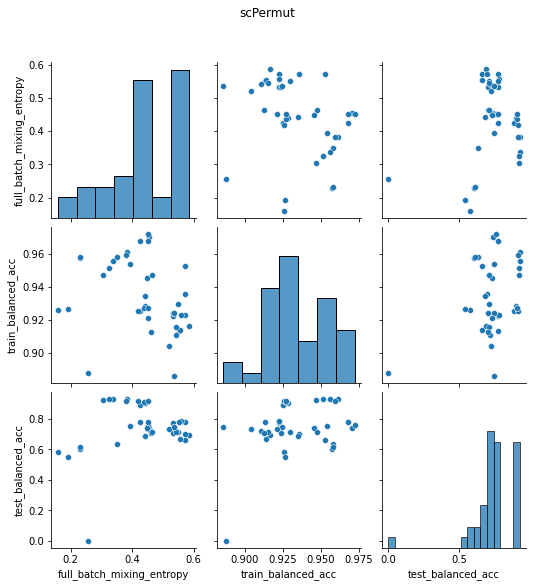

<Figure size 432x288 with 0 Axes>

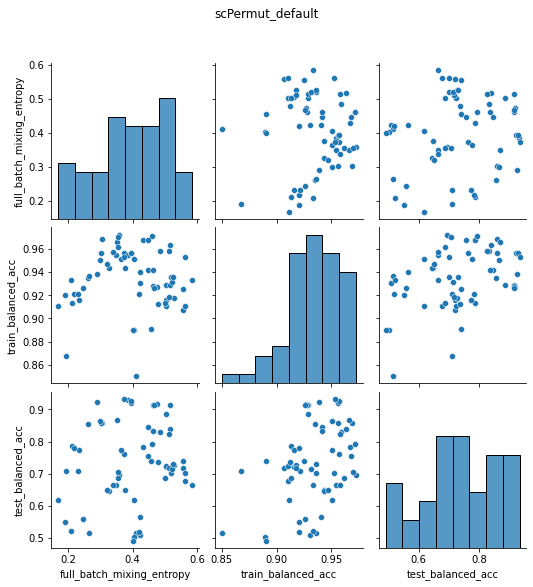

<Figure size 432x288 with 0 Axes>

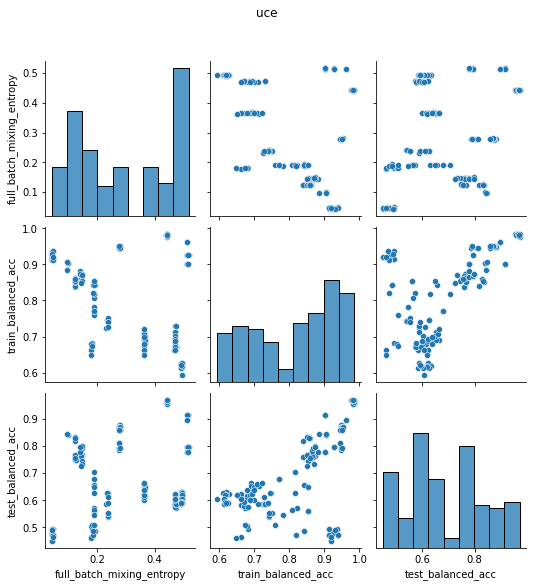

<Figure size 432x288 with 0 Axes>

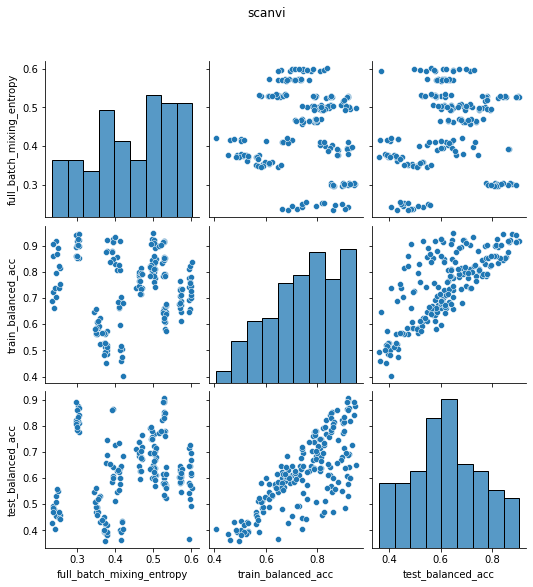

<Figure size 432x288 with 0 Axes>

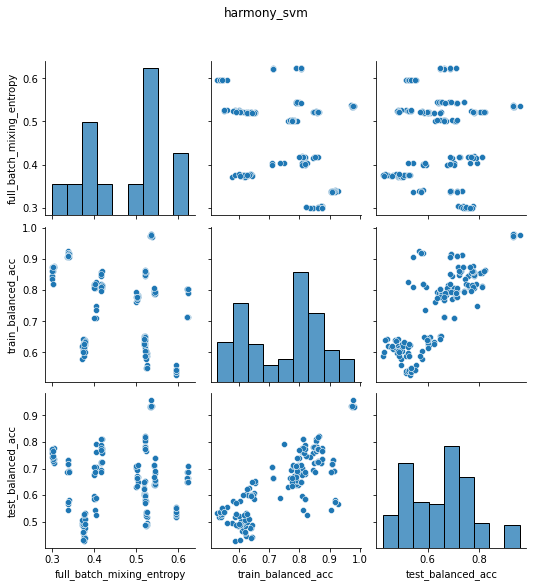

<Figure size 432x288 with 0 Axes>

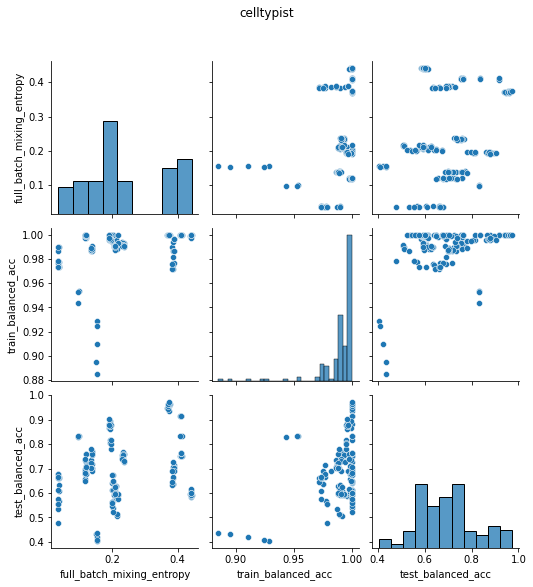

<Figure size 432x288 with 0 Axes>

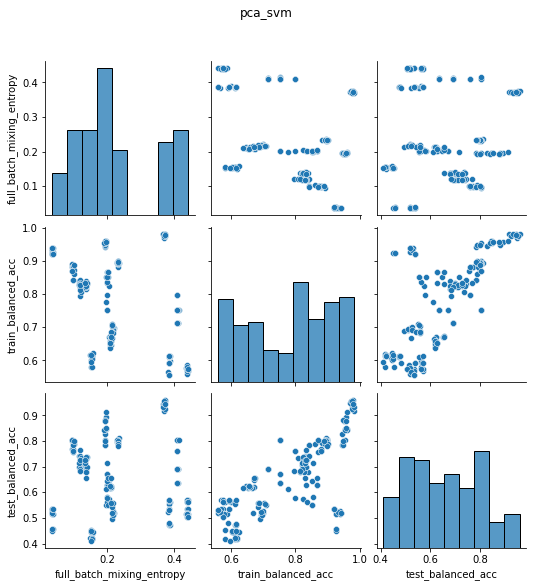

<Figure size 432x288 with 0 Axes>

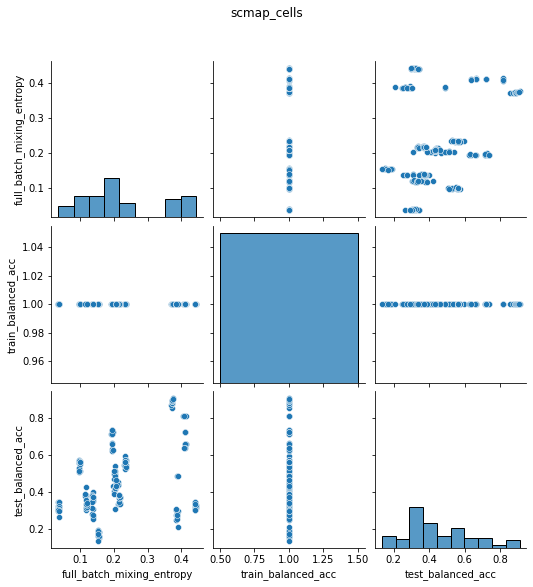

<Figure size 432x288 with 0 Axes>

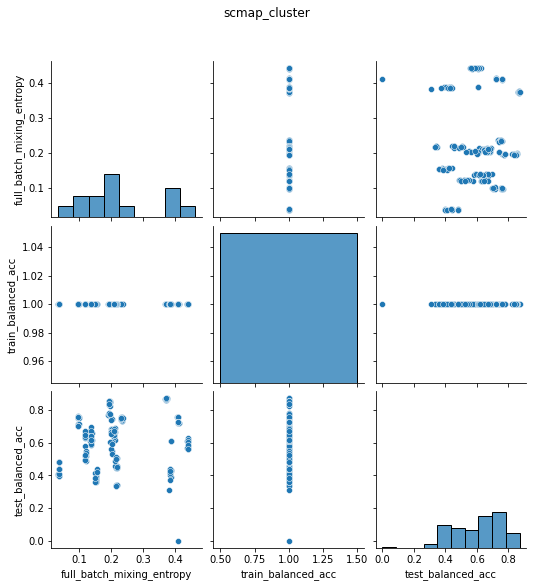

In [32]:
# task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query("model == 'scPermut_default'").query("training_scheme == 'training_scheme_8'")#[['dataset_name', 'test_balanced_acc']]
from tqdm.notebook import tqdm
for model in tqdm(aestetic_model_name) : 
    if model in ['scPermut_default', 'scPermut']:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'").query("training_scheme == 'training_scheme_8'")
    else:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'")
    print(task_1[model].value_counts)
    plt.figure()
    g=sns.pairplot(task_1[['full_batch_mixing_entropy', 'train_balanced_acc','test_balanced_acc']])
    g.fig.suptitle(model, y=1.08) # y= some height>1

In [20]:
complexity_df = pd.read_csv(working_dir + 'experiment_script/benchmark/complexity_df.csv', index_col = 0)

In [70]:
complexity_df.index = complexity_df.dataset

In [71]:
n_batches = pd.Series({n:i.obs[batch_key_dict[n]].nunique() for n,i in adatas.items()})

In [72]:
complexity_df['n_batches'] = n_batches

In [86]:
for ds in complexity_df['dataset']:
    s = {'n_' + k: len(v) for k, v in get_sizes(adatas[ds], class_key_dict[ds]).items()}
    for k, v in s.items():
        complexity_df.loc[ds, k] = v

In [97]:
complexity_df= complexity_df.reset_index()

In [98]:
complexity_df.to_csv(working_dir + 'experiment_script/benchmark/complexity_df.csv')

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query("model == 'scPermut_default'").query("training_scheme == 'training_scheme_8'")[['dataset_name', 'test_balanced_acc']]


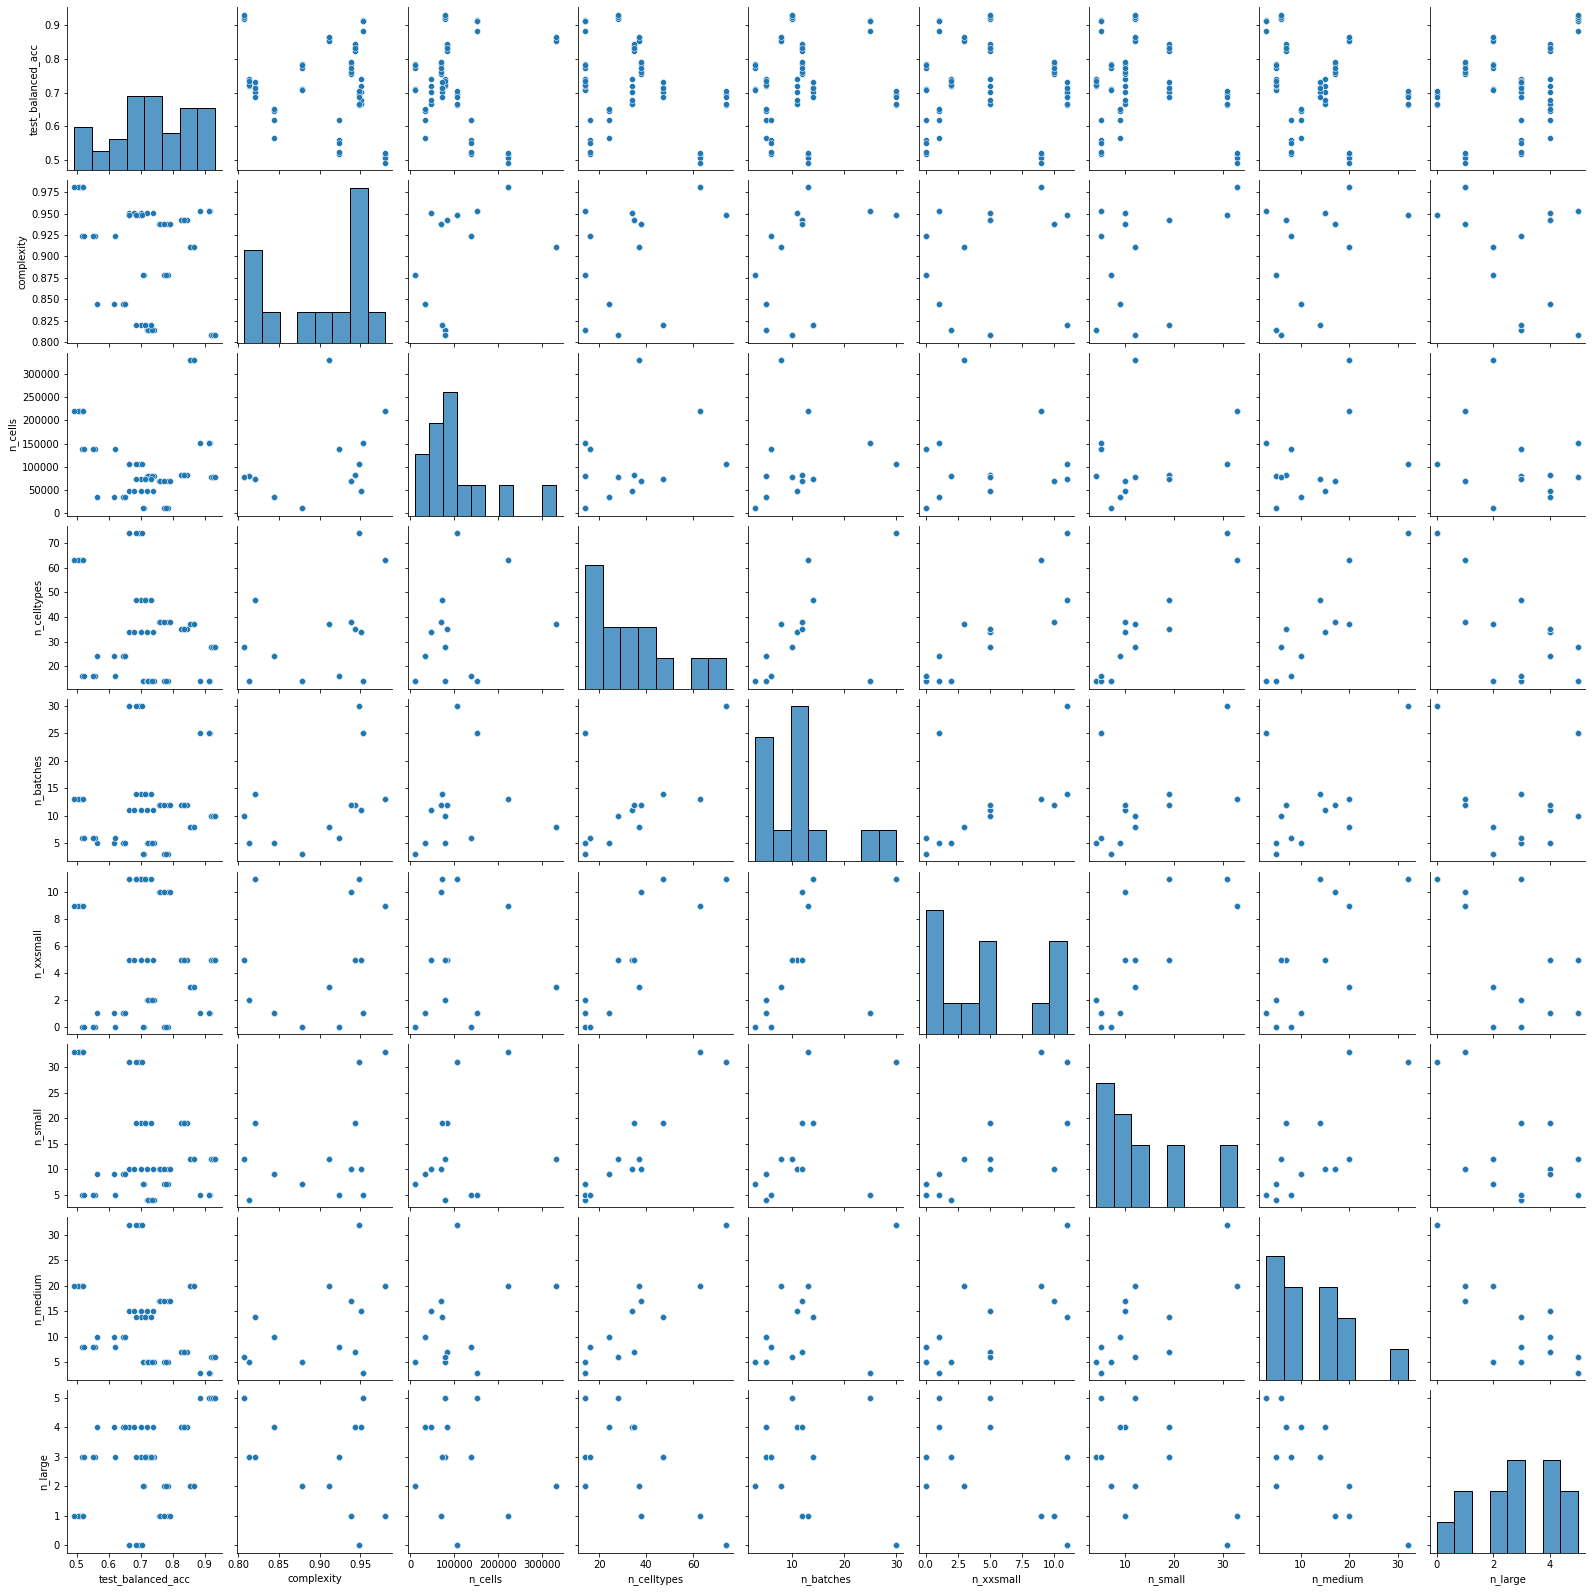

In [22]:
df = pd.merge(task_1, complexity_df, left_on = 'dataset_name', right_on = 'dataset')
sns.pairplot(df)

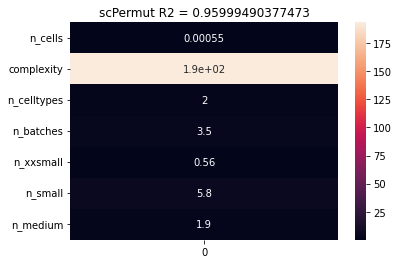

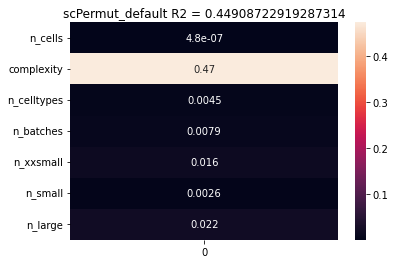

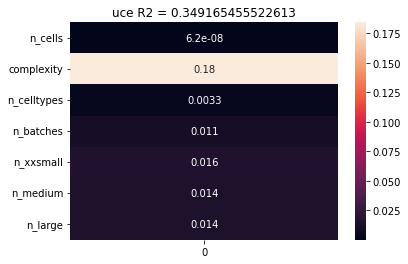

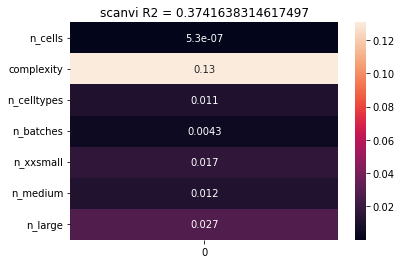

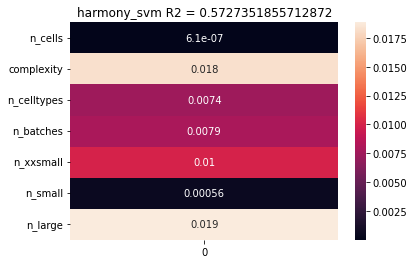

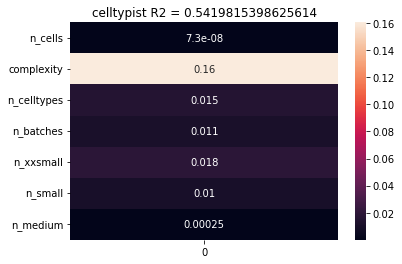

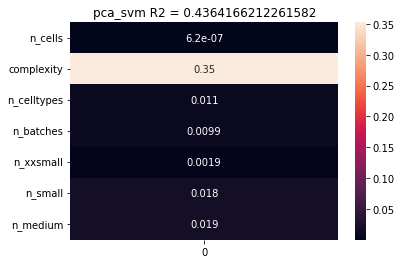

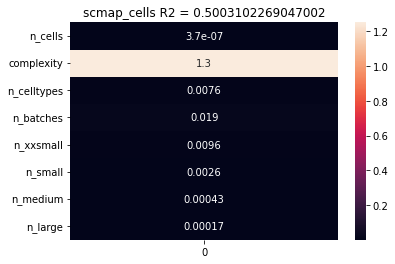

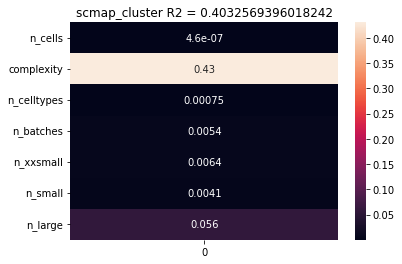

In [147]:
feature_names = ['n_cells','complexity','n_celltypes', 'n_batches', 'n_xxsmall','n_small','n_medium','n_large']

for model in aestetic_model_name : 
    if model in ['scPermut_default', 'scPermut']:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'").query("training_scheme == 'training_scheme_8'")[['dataset_name', 'test_balanced_acc']]
    else:
        task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False').query(f"model == '{model}'")[['dataset_name', 'test_balanced_acc']]

    df = pd.merge(task_1, complexity_df, left_on = 'dataset_name', right_on = 'dataset')
    
    best_score = 0
    df = df.dropna()
    if not df.empty:
        for L in range(len(feature_names) + 1):
            for subset in itertools.combinations(feature_names, L):
                if subset:
                    subset = list(subset)
                    lr = LinearRegression()
                
                    X = df[subset].values
                    Y = df['test_balanced_acc'].values
                    
                    lr.fit(X, Y)
                    score = lr.score(X, Y)
                    if score > best_score:
                        best_score = score
                        best_coeff = lr.coef_
                        best_features = subset
                    if len(subset) == 8:
                        full_score = score
                        full_coeff = lr.coef_
        plt.figure()
        sns.heatmap(np.abs(best_coeff.reshape(-1,1)), yticklabels = best_features, annot=True)
        plt.title(f'{model} R2 = {best_score}')

### Correlation between mean acc and dataset characteristics

In [17]:
{n:i.n_obs for n,i in adatas.items()}

{'htap': 72583,
 'ajrccm_by_batch': 77969,
 'hlca_par_dataset_harmonized': 330199,
 'hlca_trac_dataset_harmonized': 137922,
 'koenig_2022': 150582,
 'tosti_2021': 79367,
 'yoshida_2021': 46964,
 'tran_2021': 10067,
 'dominguez_2022_lymph': 82974,
 'dominguez_2022_spleen': 70099,
 'tabula_2022_spleen': 34004,
 'litvinukova_2020': 220848,
 'lake_2021': 105428}

In [18]:
class_key_dict = {'htap':'ann_finest_level', 
'yoshida_2021':'Original_annotation',
'hlca_trac_dataset_harmonized':'ann_finest_level',
'lake_2021':'Original_annotation',
'dominguez_2022_spleen':'Original_annotation',
'ajrccm_by_batch':'celltype',
'tosti_2021':'Original_annotation',
'tran_2021':'Original_annotation', 
'litvinukova_2020':'Original_annotation', 
'hlca_par_dataset_harmonized':'ann_finest_level', 
'dominguez_2022_lymph':'Original_annotation', 
'tabula_2022_spleen':'Original_annotation',
                 'koenig_2022': 'Original_annotation'}

In [19]:
def dataset_complexity(adata, class_key, plot_corr= False):
    pdata = dc.get_pseudobulk(
    adata,
    sample_col=class_key,
    groups_col=class_key,
    mode='mean',
    min_cells=0,
    min_counts=0
)
    corr_matrix = pd.DataFrame(np.corrcoef(pdata.X), index = pdata.obs_names, columns = pdata.obs_names)
    np.fill_diagonal(corr_matrix.values, 0)
    if plot_corr:
        plt.figure(figsize = (20,15))
        sns.heatmap(corr_matrix, vmax = 1, vmin = 0)
    return corr_matrix

In [104]:
comp_dict = {}
for name, ad in adatas.items():
    print(name)
    print(class_key_dict[name])
    corr = dataset_complexity(adatas[name], class_key_dict[name],plot_corr=False)
    comp_dict[name] = corr.max(axis=1).mean()

htap
ann_finest_level
ajrccm_by_batch
celltype
hlca_par_dataset_harmonized
ann_finest_level
hlca_trac_dataset_harmonized
ann_finest_level
koenig_2022
Original_annotation
tosti_2021
Original_annotation
yoshida_2021
Original_annotation
tran_2021
Original_annotation
dominguez_2022_lymph
Original_annotation
dominguez_2022_spleen
Original_annotation
tabula_2022_spleen
Original_annotation
litvinukova_2020
Original_annotation
lake_2021
Original_annotation


In [105]:
complexity_df = pd.DataFrame({'dataset': adatas.keys(),'complexity': adatas.values()})

In [106]:
complexity_df = pd.DataFrame({'dataset': comp_dict.keys(),'complexity': comp_dict.values()})

In [107]:
complexity_df['n_cells'] = [ad.n_obs for ad in adatas.values()]
complexity_df['n_celltypes'] = [len(ad.obs[class_key_dict[name]].unique()) for name,ad in adatas.items()]

<Axes: xlabel='dataset'>

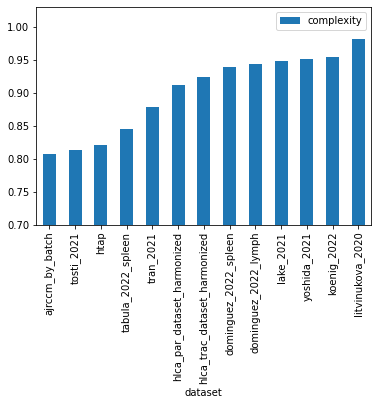

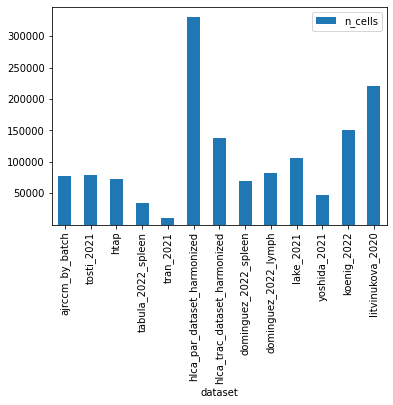

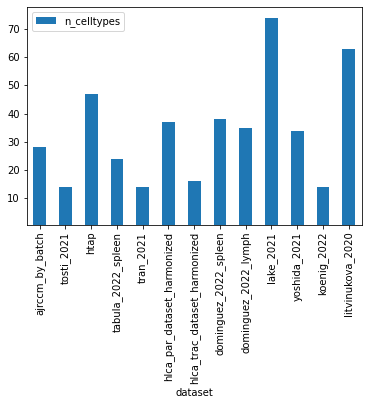

In [108]:
complexity_df.sort_values('complexity').plot.bar(x= 'dataset', y = 'complexity', ylim= 0.7)
complexity_df.sort_values('complexity').plot.bar(x= 'dataset', y = 'n_cells', ylim= 0.7)
complexity_df.sort_values('complexity').plot.bar(x= 'dataset', y = 'n_celltypes', ylim= 0.7)


In [110]:
complexity_df.to_csv(working_dir + 'experiment_script/benchmark/complexity_df.csv')

### scatterplot with error

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt


def scatter_error(data, x, y, group, figsize = (7,5), ax = None, return_ax = False, show = True, title = None):
    '''
    scatter plots of the mean of the x and y fields by group. Additional bars are plotted representing the variances of x and y by group
    '''
    mean_data = data.groupby(group, as_index=False).agg({x: 'mean', y: 'mean'})
    variance_data = data.groupby(group, as_index=False).agg({x: 'std', y: 'std'})

    plt.figure(figsize = figsize)
    sns.scatterplot(x=x, y=y, data=mean_data, hue=group, s=100, legend="full", ax = ax)
    if ax : 
        for index, row in enumerate(mean_data.itertuples()):
            ax.errorbar(
                x=getattr(row,x),
                y=getattr(row,y),
                xerr=variance_data.iloc[index][x],
                yerr=variance_data.iloc[index][y],
                fmt='o'
            )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
    else:
        for index, row in enumerate(mean_data.itertuples()):
            plt.errorbar(
                x=getattr(row,x),
                y=getattr(row,y),
                xerr=variance_data.iloc[index][x],
                yerr=variance_data.iloc[index][y],
                fmt='o'
            )
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(title)
    if show:
        plt.show()

    plt.close()
    if return_ax :

        return ax

### scatterplot with error on a metric list

In [ ]:
n_metrics = len(pred_metrics_list)

f, axes = plt.subplots(n_metrics,n_metrics, figsize = (20,20),constrained_layout=True)
i = 0
for r in range(n_metrics):
    for c in range(n_metrics):
        ax = axes[r,c]
        x = 'val_' + pred_metrics_list[c]
        y = 'val_' + pred_metrics_list[r]
        scatter_error(data=test, x = x, y = y, group = 'model', ax = ax, show = False)
        ax.get_legend().remove()

        if r !=0:
            ax.set_xlabel('')
        if r == 0:
            ax.xaxis.set_label_position('top') 
        if c!=0 :
            ax.set_ylabel('')
    

In [352]:
def plot_scatter(data, group, metric_list_1, metric_list_2, train_split = 'val'):
    '''
    given to sets of metrics, plots the scatterplots with error bars....

    train_split : one of ['train','val','test','full']    
    '''
    if len(metric_list_1) == 1:
        metric_list_1 = [metric_list_1]
    if len(metric_list_2) == 1:
        metric_list_2 = [metric_list_2]
    n_metrics_1 = len(metric_list_1)
    n_metrics_2 = len(metric_list_2)
    f, axes = plt.subplots(n_metrics_1,n_metrics_2, figsize = (20,20),constrained_layout=True)
    i = 0
    for r in range(n_metrics_1):
        for c in range(n_metrics_2):
            ax = axes[r,c]
            x = train_split + '_' + metric_list_2[c]
            y = train_split + '_' + metric_list_1[r]
            scatter_error(data=data, x = x, y = y, group = group, ax = ax, show = False)
            ax.get_legend().remove()
    
            if r !=0:
                ax.set_xlabel('')
            if r == 0:
                ax.xaxis.set_label_position('top') 
            if c!=0 :
                ax.set_ylabel('')
        

In [ ]:
plot_scatter(test, 'model', pred_metrics_list, clustering_metrics_list +clustering_metrics_list, train_split= 'val')